In [83]:
# Data Cleaning AirBnB (2024 Barcelona, Spain Listings)

In [256]:
# Chapter 1: Data Cleaning Steps:
# - Drop duplicates
# - Drop irrelevant data
# - Fix structural errors i.e. data type mismatch
# - Handle missing data 
#   -- drop the feature
#   -- drop the rows
#   -- fill in missing data with mean, median, mode (categorical data, back or forward fill, regression, or multople imputation methods)  

In [240]:
# Load packages
import pandas as pd
import numpy as np
import plotly.express as px

In [18]:
# Read CSV
df = pd.read_csv('listings.csv')
df.head(10)

id                                               name  host_id  \
0  18674    Huge flat for 8 people close to Sagrada Familia    71615   
1  23197  Forum CCIB DeLuxe, Spacious, Large Balcony, relax    90417   
2  32711                   Sagrada Familia area - Còrsega 1   135703   
3  34241   Stylish Top Floor Apartment - Ramblas Plaza Real    73163   
4  34981               VIDRE HOME PLAZA REAL on LAS RAMBLAS    73163   
5  36463                 Exquisite studio in Barcelona Born   156814   
6  36763                              In front of the beach   158596   
7  40983                   Soho Colonial Eclectic Apartment   177617   
8  41952                 Modern Apartment - Sagrada Familia   183340   
9  49968                   Sagrada Familia area - Còrsega 2   135703   

        host_name neighbourhood_group                          neighbourhood  \
0   Mireia  Maria            Eixample                     la Sagrada Família   
1  Etain (Marnie)          Sant Martí                  el Besòs i el Maresme   
2            Nick              Gràcia     el Camp d'en Grassot i Gràcia Nova   
3          Andres        Ciutat Vella                         el Barri Gòtic   
4          Andres        Ciutat Vella                         el Barri Gòtic   
5    Miren Josune        Ciutat Vella  Sant Pere, Santa Caterina i la Ribera   
6           Ester        Ciutat Vella                         la Barceloneta   
7         Joaquin            Eixample                 la Dreta de l'Eixample   
8          Teresa              Gràcia     el Camp d'en Grassot i Gràcia Nova   
9            Nick              Gràcia     el Camp d'en Grassot i Gràcia Nova   

    latitude  longitude        room_type  price  minimum_nights  \
0  41.405560    2.17262  Entire home/apt  194.0               1   
1  41.412432    2.21975  Entire home/apt  304.0               3   
2  41.405660    2.17015  Entire home/apt  211.0               1   
3  41.380620    2.17517  Entire home/apt  300.0               5   
4  41.379780    2.17623  Entire home/apt  314.0               5   
5  41.385120    2.18109  Entire home/apt   87.0              30   
6  41.380430    2.19094     Private room    NaN              31   
7  41.396310    2.16832  Entire home/apt  164.0               2   
8  41.405680    2.16943  Entire home/apt  190.0               3   
9  41.405700    2.17016  Entire home/apt  240.0               1   

   number_of_reviews last_review  reviews_per_month  \
0                 42  2024-06-03               0.31   
1                 79  2024-06-24               0.48   
2                128  2024-09-05               0.80   
3                 20  2024-08-20               0.12   
4                247  2024-09-02               1.46   
5                104  2018-09-24               0.70   
6                108  2023-12-13               0.69   
7                335  2024-09-06               2.08   
8                 94  2024-07-28               0.63   
9                112  2024-08-25               0.70   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                              28                72                      3   
1                               1               116                      7   
2                               3               319                     32   
3                               3                69                     12   
4                               3               241                     37   
5                               1               337                      0   
6                               1                 0                      2   
7                               7               278                     56   
8                               3               295                     20   
9                               3               305                     29   

       license  
0  HUTB-002062  
1   HUTB005057  
2  HUTB-001722  
3       Exempt  
4  HUTB-150671  
5          NaN  
6         

In [14]:
# Get the dimensions of the dataframe
df.shape

(19482, 18)

In [10]:
# Display information about data types and non-null counts
print("\nDataset Information:")
pd.options.display.max_info_columns = 50
print(df.info())  


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19482 entries, 0 to 19481
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19482 non-null  int64  
 1   name                            19482 non-null  object 
 2   host_id                         19482 non-null  int64  
 3   host_name                       19480 non-null  object 
 4   neighbourhood_group             19482 non-null  object 
 5   neighbourhood                   19482 non-null  object 
 6   latitude                        19482 non-null  float64
 7   longitude                       19482 non-null  float64
 8   room_type                       19482 non-null  object 
 9   price                           15422 non-null  float64
 10  minimum_nights                  19482 non-null  int64  
 11  number_of_reviews               19482 non-null  int64  
 12  last_revie

In [22]:
# View sample of 10 rows
df.sample(10)

id                                               name  \
3971              20778297        Bright, beautifull & full equiped apartment   
724                1458524     Sunny modern penthouse with delightful terrace   
14381   950747756305096169       Bonita habitación doble, A/C, centro, balcón   
6488              37071332  Family Duplex 2Adults+2Children Steps From Sub...   
11551   707597054001520804                    Cozy Room In Downtown Barcelona   
14129   928941163244537984                                 A nice room in BCN   
15809  1055657123351032610                     Fantástica casita con terrazas   
8991              50608090              Standard twin room & Private bathroom   
11812   745520358775045342                    Elegant and modernist apartment   
11161   683042876142619827              R0175- Hab. muy espaciosa en Eixample   

         host_id        host_name neighbourhood_group  \
3971   148899743         Carolina            Eixample   
724      7784911             Marc            Eixample   
14381  141336147           Sergio            Eixample   
6488     4258623            08028           Les Corts   
11551  406219299  Raquel Cristina              Gràcia   
14129    3081150           Andrea      Sants-Montjuïc   
15809  407025665           Javier        Ciutat Vella   
8991   254596373            Tanya        Ciutat Vella   
11812  330330852            Viola            Eixample   
11161  357946540            Enter            Eixample   

                         neighbourhood   latitude  longitude        room_type  \
3971   l'Antiga Esquerra de l'Eixample  41.388200   2.155060  Entire home/apt   
724                 la Sagrada Família  41.406600   2.176420  Entire home/apt   
14381                      Sant Antoni  41.382010   2.162260     Private room   
6488                         les Corts  41.384260   2.129910  Entire home/apt   
11551                la Vila de Gràcia  41.403816   2.160634     Private room   
14129                       la Bordeta  41.372060   2.141170     Private room   
15809                         el Raval  41.381510   2.165520  Entire home/apt   
8991                    el Barri Gòtic  41.387490   2.173740     Private room   
11812           la Dreta de l'Eixample  41.392160   2.176860  Entire home/apt   
11161                      Sant Antoni  41.380417   2.156758     Private room   

        price  minimum_nights  number_of_reviews last_review  \
3971      NaN              32                  9  2020-03-21   
724     265.0               1                106  2024-09-05   
14381    96.0               2                 42  2024-07-07   
6488    310.0               1                 26  2024-05-01   
11551    60.0              31                  0         NaN   
14129    45.0               1                125  2024-09-03   
15809     NaN              32                  0         NaN   
8991      NaN               1                  3  2021-08-29   
11812  1156.0              32                  0         NaN   
11161    29.0              33                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
3971                0.11                               1                 0   
724                 2.95                               1               277   
14381               3.34                               2               354   
6488                0.44                               7               150   
11551                NaN                               1                89   
14129               9.31                               2               108   
15809                NaN                              13                 0   
8991                0.08                               8                 0   
11812                NaN                              18               365   
11161                NaN                             365               309   

       number_of_reviews_ltm      license  
3971

In [24]:
# Check if there are duplicate rows
len(df) - len(df.drop_duplicates())

0

In [32]:
# Calculate the percentage of missing values and sort
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)

license                           31.79
last_review                       24.39
reviews_per_month                 24.39
price                             20.84
host_name                          0.01
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
name                               0.00
minimum_nights                     0.00
number_of_reviews                  0.00
host_id                            0.00
calculated_host_listings_count     0.00
availability_365                   0.00
number_of_reviews_ltm              0.00
id                                 0.00
dtype: float64

In [44]:
# Drop the columns with missing values which are not needed for the analysis
df = df.drop(['license'], axis=1, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19482 entries, 0 to 19481
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19482 non-null  int64  
 1   name                            19482 non-null  object 
 2   host_id                         19482 non-null  int64  
 3   host_name                       19480 non-null  object 
 4   neighbourhood_group             19482 non-null  object 
 5   neighbourhood                   19482 non-null  object 
 6   latitude                        19482 non-null  float64
 7   longitude                       19482 non-null  float64
 8   room_type                       19482 non-null  object 
 9   price                           15422 non-null  float64
 10  minimum_nights                  19482 non-null  int64  
 11  number_of_reviews               19482 non-null  int64  
 12  last_review                     

In [46]:
# Convert data types for "id" and "host_id" to object
df[['id', 'host_id']] = df[['id', 'host_id']].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19482 entries, 0 to 19481
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19482 non-null  object 
 1   name                            19482 non-null  object 
 2   host_id                         19482 non-null  object 
 3   host_name                       19480 non-null  object 
 4   neighbourhood_group             19482 non-null  object 
 5   neighbourhood                   19482 non-null  object 
 6   latitude                        19482 non-null  float64
 7   longitude                       19482 non-null  float64
 8   room_type                       19482 non-null  object 
 9   price                           15422 non-null  float64
 10  minimum_nights                  19482 non-null  int64  
 11  number_of_reviews               19482 non-null  int64  
 12  last_review                     

In [48]:
# View a sample of three records
df.sample(3)

id                                               name  \
17707  1152270794244028064  Apartamento para cinco personas en Sagrada Fam...   
8288              45967918  Lujo y amplitud Espectacular Terraza Centro ci...   
18066  1166652641867607864          Double room in Gracia , aircon and window   

         host_id       host_name neighbourhood_group  \
17707    1205494     Gian Franco            Eixample   
8288   372637490           Jordi            Eixample   
18066   31538271  Hola Barcelona      Horta-Guinardó   

                         neighbourhood   latitude  longitude        room_type  \
17707               la Sagrada Família  41.405006   2.177001  Entire home/apt   
8288   l'Antiga Esquerra de l'Eixample  41.387760   2.162200  Entire home/apt   
18066                 el Baix Guinardó  41.409460   2.170690     Private room   

        price  minimum_nights  number_of_reviews last_review  \
17707   111.0               1                  7  2024-09-06   
8288   1100.0               3                 88  2024-08-19   
18066    48.0               3                  5  2024-08-18   

       reviews_per_month  calculated_host_listings_count  availability_365  \
17707               7.00                              15               307   
8288                2.15                               4               303   
18066               1.74                              17                28   

       number_of_reviews_ltm  
17707                      7  
8288                      31  
18066                      5

In [59]:
# Correct data type mismatch for columns that should be of datetime data type
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19482 entries, 0 to 19481
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19482 non-null  object        
 1   name                            19482 non-null  object        
 2   host_id                         19482 non-null  object        
 3   host_name                       19480 non-null  object        
 4   neighbourhood_group             19482 non-null  object        
 5   neighbourhood                   19482 non-null  object        
 6   latitude                        19482 non-null  float64       
 7   longitude                       19482 non-null  float64       
 8   room_type                       19482 non-null  object        
 9   price                           15422 non-null  float64       
 10  minimum_nights                  19482 non-null  int64         
 11  nu

In [63]:
# Create dataframe of missing "last_review" and view a sample
df[df['last_review'].isnull()].sample(5)

id                                             name  \
2043               8723781                 Double room in an artist´s house   
17901  1160707207556162167              Piso de 2 habitaciones y 1 baño 3-1   
11547   707005330791764116            Kamina - 2 bedrooms in Eixample Dreta   
18173  1171711233365663993  Blueground | Sagrada Familia, stylish furniture   
19298  1232384995409434059               Views Cathedral private room for 2   

         host_id            host_name neighbourhood_group  \
2043    45786070            Magdalena          Sant Martí   
17901  517835451                Torns      Sants-Montjuïc   
11547  346367515                 Ukio            Eixample   
18173  447375626           Blueground            Eixample   
19298  392248330  Carolina And Camilo        Ciutat Vella   

                neighbourhood   latitude  longitude        room_type  price  \
2043              el Poblenou  41.406110   2.204200     Private room    NaN   
17901           Sants - Badal  41.373410   2.125400  Entire home/apt   70.0   
11547  la Dreta de l'Eixample  41.392860   2.163210  Entire home/apt    NaN   
18173      la Sagrada Família  41.403767   2.180026  Entire home/apt  112.0   
19298          el Barri Gòtic  41.383810   2.175910     Private room   92.0   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
2043                1                  0         NaT                NaN   
17901              31                  0         NaT                NaN   
11547              31                  0         NaT                NaN   
18173              31                  0         NaT                NaN   
19298               3                  0         NaT                NaN   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
2043                                1                 0                      0  
17901                               6               194                      0  
11547                             437                 0                      0  
18173                             138               330                      0  
19298                               7               105                      0

In [67]:
# Fill missing reviews per month with zero
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [69]:
# Calculate the percentage of missing values and sort
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)

last_review                       24.39
price                             20.84
host_name                          0.01
id                                 0.00
availability_365                   0.00
calculated_host_listings_count     0.00
reviews_per_month                  0.00
number_of_reviews                  0.00
minimum_nights                     0.00
room_type                          0.00
name                               0.00
longitude                          0.00
latitude                           0.00
neighbourhood                      0.00
neighbourhood_group                0.00
host_id                            0.00
number_of_reviews_ltm              0.00
dtype: float64

In [93]:
# Chapter 2: Exploratory Data Analysis (EDA)
# Chapter 2.1 Univariate analysis
#   -- numeric features
#   -- categorical features
# Chapter 2.2 Bivariate analysis
#   -- numeric with numeric features
#   -- numeric with categorical features

In [168]:
# Load modules for visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [152]:
# Chapter 2.1 Univariate analysis: numeric
# Questions:
# What are typical listing prices per night?
# What are the minimum number of nights for booking?
# For this data how many listings do hosts have?
# Are there more or less days available for booking?
# What do the units offer in terms of beds and bedrooms?

In [95]:
# View list of numeric columns
numeric_cols = df.select_dtypes(include = ['int64', 'float64'])
numeric_cols.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'num_bedrooms',
       'num_bathrooms', 'num_beds', 'shared_bath'],
      dtype='object')

In [110]:
# Filter data to numeric columns to view their distribution (typical values and variabilities)
numeric_cols = df[['price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm']]

In [114]:
# Generate summary statistics
numeric_cols.describe()

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  15422.000000    19482.000000       19482.000000       19482.000000   
mean     168.633575       15.393799          47.606714           1.148368   
std      262.686362       30.786373          99.350461           1.918337   
min        8.000000        1.000000           0.000000           0.000000   
25%       66.000000        1.000000           1.000000           0.010000   
50%      128.000000        3.000000           7.000000           0.380000   
75%      212.000000       31.000000          48.000000           1.750000   
max     9999.000000     1124.000000        2453.000000          74.630000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    19482.000000      19482.000000           19482.000000  
mean                        41.368237        177.206704              11.905810  
std                         88.454600        125.322884              24.813159  
min                          1.000000          0.000000               0.000000  
25%                          1.000000         59.000000               0.000000  
50%                          6.000000        183.000000               2.000000  
75%                         33.000000        300.000000              16.000000  
max                        437.000000        365.000000            1287.000000

In [122]:
# View percentiles for the first seven columns
numeric_cols.iloc[:,0:7].describe(percentiles = [0.10, 0.25, 0.50, 0.75, 0.90, 1.0])

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  15422.000000    19482.000000       19482.000000       19482.000000   
mean     168.633575       15.393799          47.606714           1.148368   
std      262.686362       30.786373          99.350461           1.918337   
min        8.000000        1.000000           0.000000           0.000000   
10%       39.000000        1.000000           0.000000           0.000000   
25%       66.000000        1.000000           1.000000           0.010000   
50%      128.000000        3.000000           7.000000           0.380000   
75%      212.000000       31.000000          48.000000           1.750000   
90%      303.000000       32.000000         144.000000           3.230000   
100%    9999.000000     1124.000000        2453.000000          74.630000   
max     9999.000000     1124.000000        2453.000000          74.630000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    19482.000000      19482.000000           19482.000000  
mean                        41.368237        177.206704              11.905810  
std                         88.454600        125.322884              24.813159  
min                          1.000000          0.000000               0.000000  
10%                          1.000000          0.000000               0.000000  
25%                          1.000000         59.000000               0.000000  
50%                          6.000000        183.000000               2.000000  
75%                         33.000000        300.000000              16.000000  
90%                        138.000000        338.000000              39.000000  
100%                       437.000000        365.000000            1287.000000  
max                        437.000000        365.000000            1287.000000

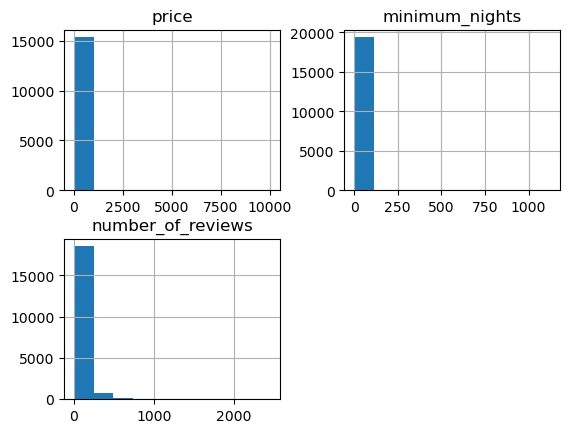

In [132]:
#Histogram for multiple features: "price", "minimum_nights", "number_of_reviews"
numeric_cols[['price', 'minimum_nights', 'number_of_reviews']].hist()
plt.show()

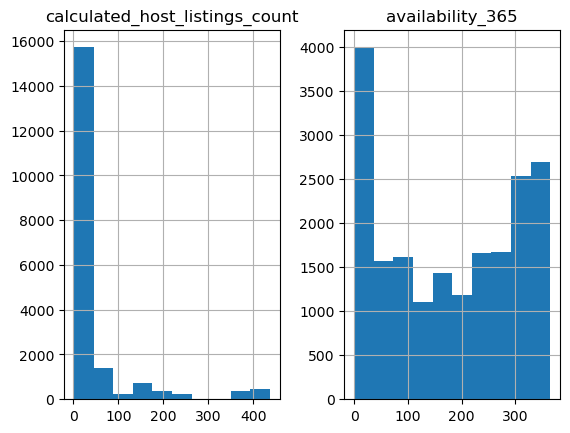

In [134]:
#Histogram for multiple features: "calculated_host_listings_count", "availability_365"
numeric_cols[['calculated_host_listings_count', 'availability_365']].hist()
plt.show()

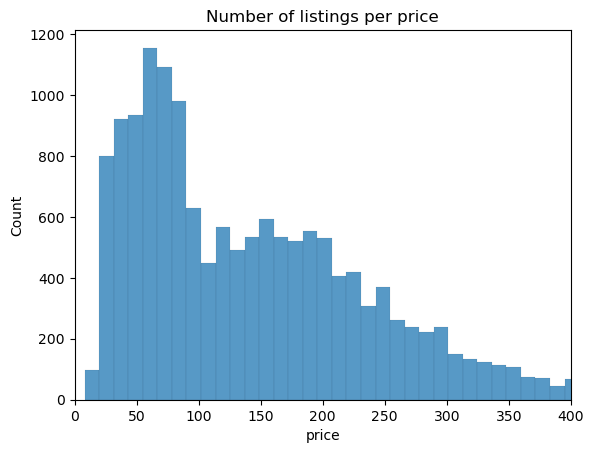

In [140]:
# Distribution of price
ax = sns.histplot(df['price'])
ax.set_xlim(0,400) 
ax.set_title('Number of listings per price')
plt.show()

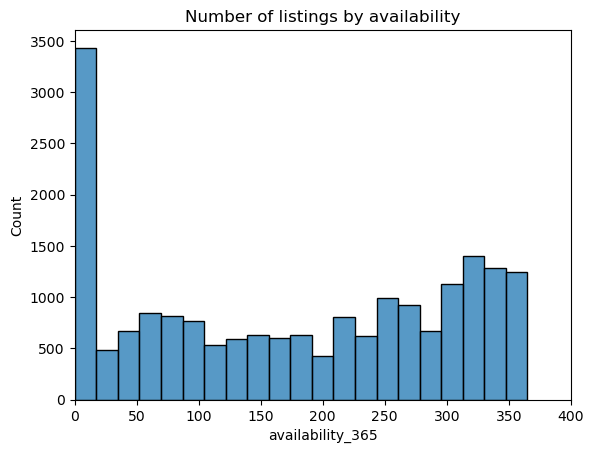

In [142]:
# Distribution of availability
ax = sns.histplot(df['availability_365'])
ax.set_xlim(0,400) 
ax.set_title('Number of listings by availability')
plt.show()

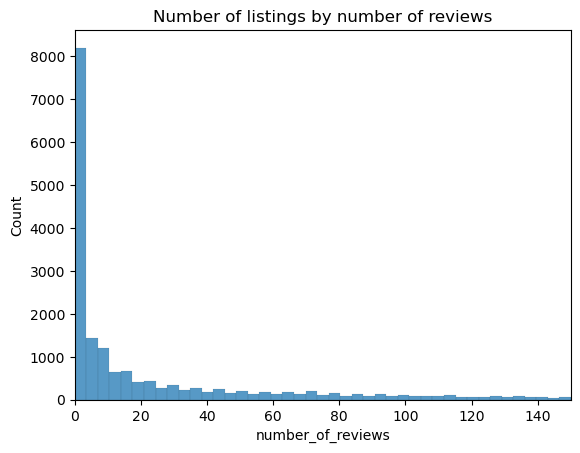

In [146]:
# Distribution of number of reviews
ax = sns.histplot(df['number_of_reviews'])
ax.set_xlim(0,150) 
ax.set_title('Number of listings by number of reviews')
plt.show()

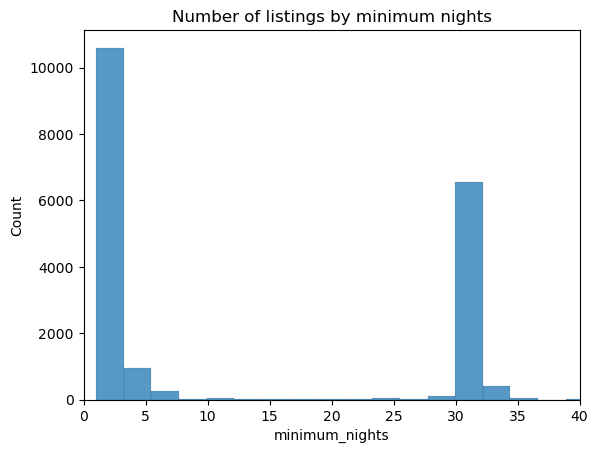

In [150]:
# Distribution of minimum nights
ax = sns.histplot(df['minimum_nights'])
ax.set_xlim(0,40) 
ax.set_title('Number of listings by minimum nights')
plt.show()

In [156]:
# Chapter 2.2 Univariate analysis: categorical
# Questions:
# How are hosts ranked? Are there hosts more popular than others?
# How are room types ranked? What rental unit types are the most popular?
# How are neighborhoods ranked? Are there more listings based on the neighborhood?

In [158]:
# View list of categorical columns
cat_cols = df.select_dtypes(include = 'object')
cat_cols.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type'],
      dtype='object')

In [160]:
# Describe categorical columns "neighbourhood" and "room_type"
df[['neighbourhood', 'room_type']].describe()

neighbourhood        room_type
count                    19482            19482
unique                      71                4
top     la Dreta de l'Eixample  Entire home/apt
freq                      2359            11589

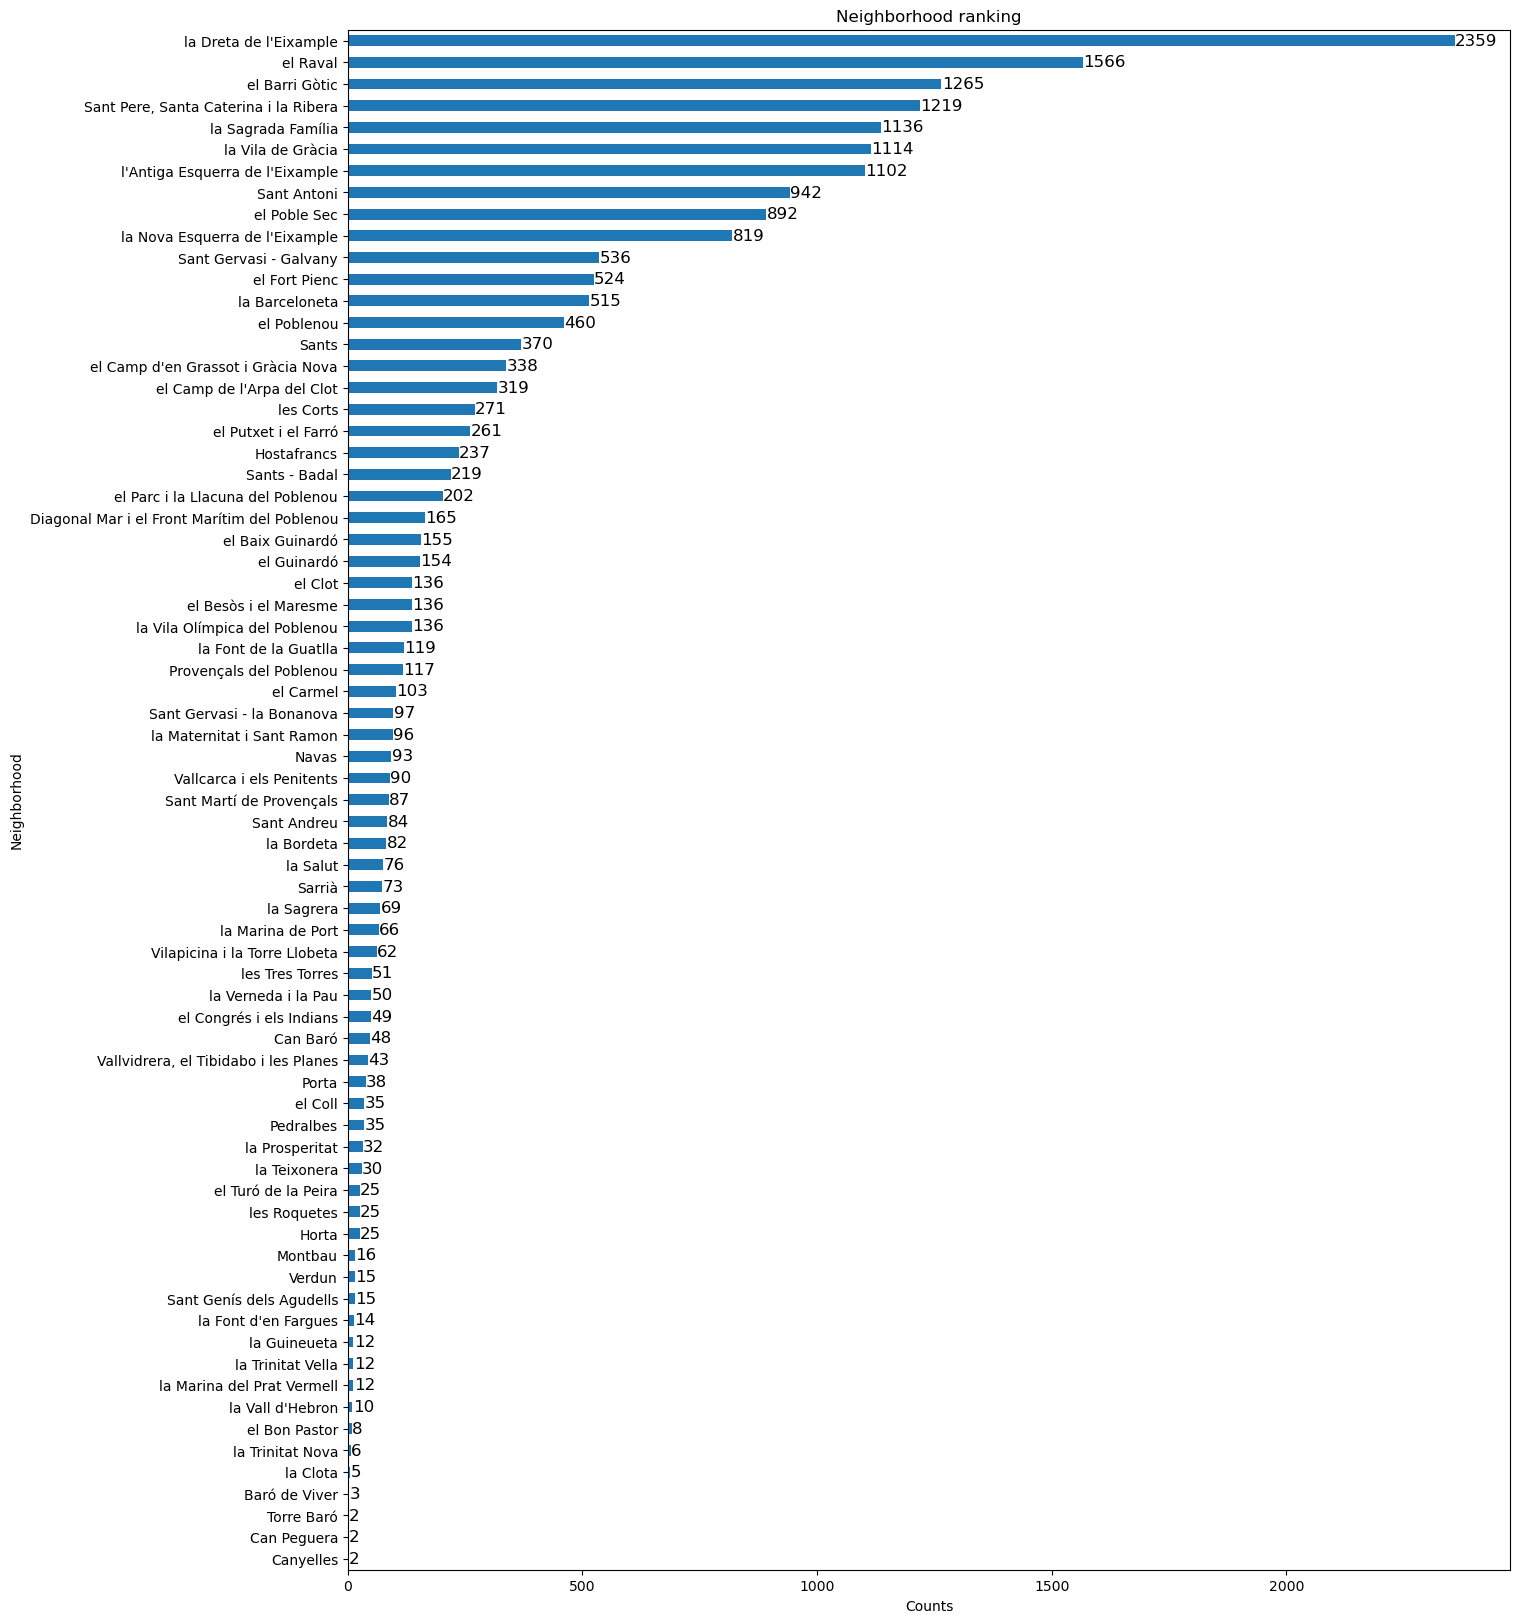

In [188]:
# Barplot of showing neighborhood popularity or ranking or frequency
ax = df['neighbourhood'].value_counts().sort_values(ascending=True).plot(
    kind='barh', 
    title='Neighborhood ranking', 
    figsize=(15, 20)
)

# Set the x-axis label
ax.set_xlabel('Counts')
ax.set_ylabel('Neighborhood')

# Add bar labels at the end of the bars
for p in ax.patches:
    # Position the label at the end of each bar
    ax.text(
        p.get_width() + 0.5,  # Position the label just outside the bar
        p.get_y() + p.get_height() / 2,  # Vertically center the label within the bar
        f'{int(p.get_width())}',  # Display the count as an integer
        ha='left',  # Horizontally align the text to the left of the label
        va='center',  # Vertically center the label
        fontsize=12,  # Font size of the label
        color='black'  # Color of the label text
    )

# Remove gridlines
ax.grid(False)

# Show the plot
plt.show()

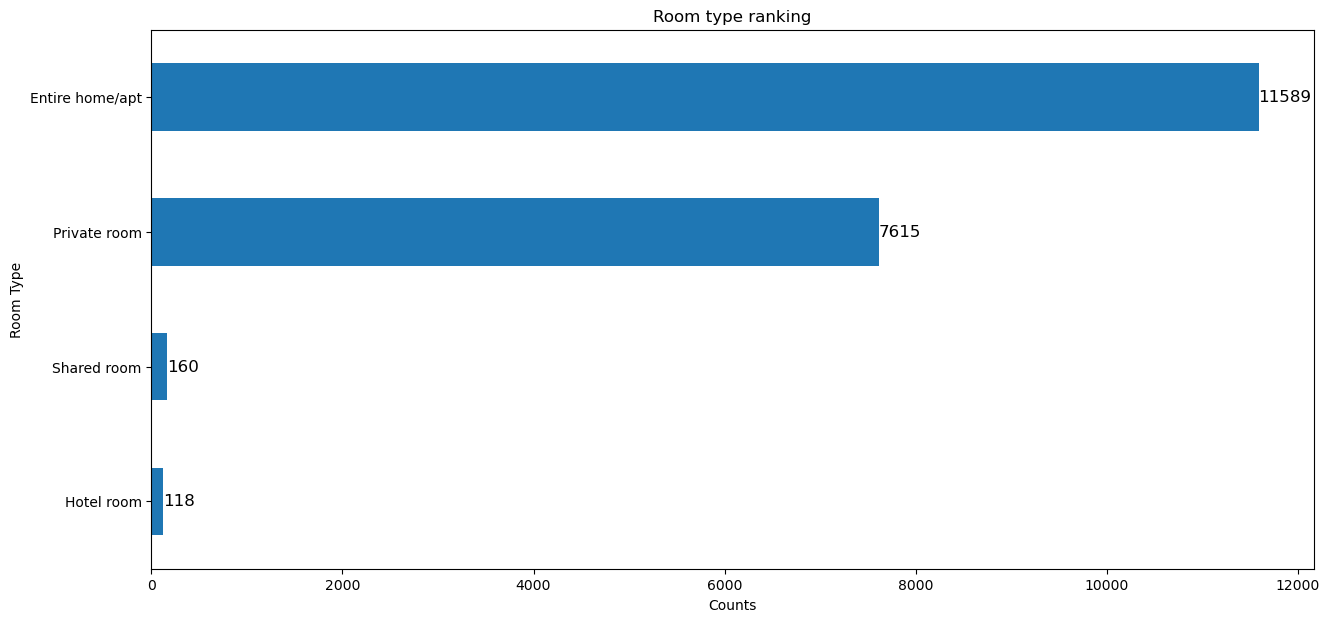

In [198]:
# Barplot of showing room type popularity or ranking or frequency
ax = df['room_type'].value_counts().sort_values(ascending=True).plot(
    kind='barh', 
    title='Room type ranking', 
    figsize=(15, 7)
)

# Set the x-axis label
ax.set_xlabel('Counts')
ax.set_ylabel('Room Type')

# Add bar labels at the end of the bars
for p in ax.patches:
    # Position the label at the end of each bar
    ax.text(
        p.get_width() + 0.5,  # Position the label just outside the bar
        p.get_y() + p.get_height() / 2,  # Vertically center the label within the bar
        f'{int(p.get_width())}',  # Display the count as an integer
        ha='left',  # Horizontally align the text to the left of the label
        va='center',  # Vertically center the label
        fontsize=12,  # Font size of the label
        color='black'  # Color of the label text
    )

# Remove gridlines
ax.grid(False)

# Show the plot
plt.show()

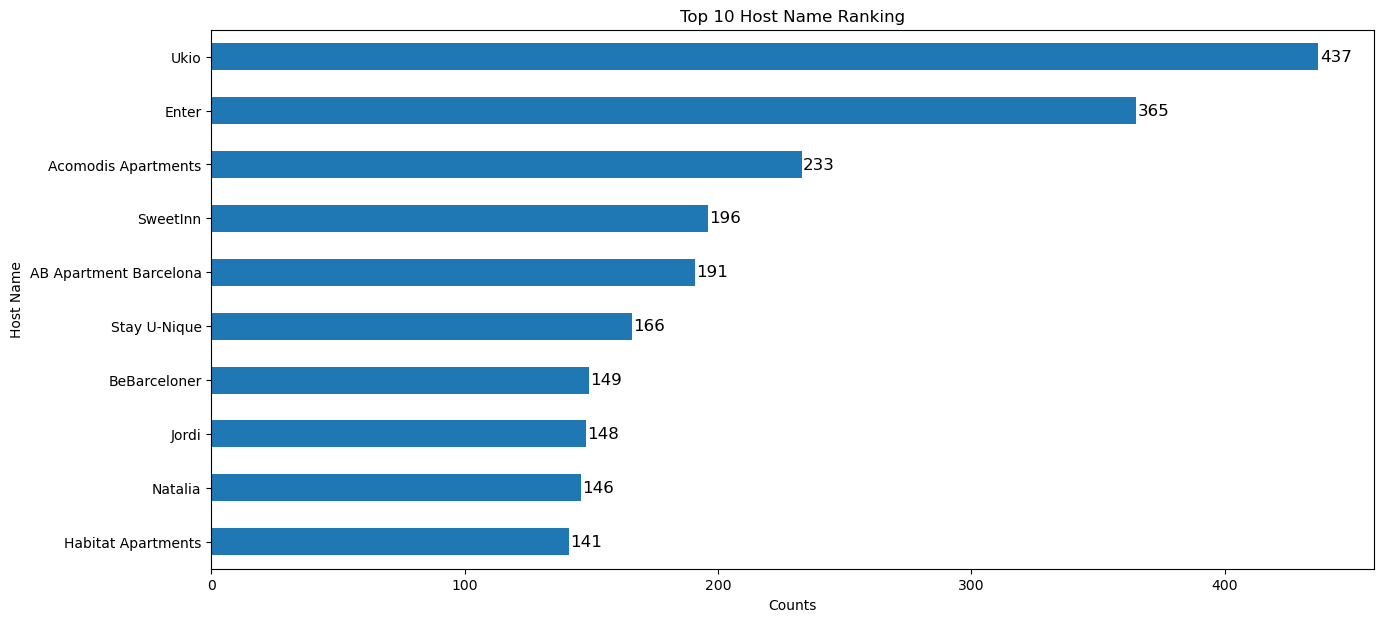

In [203]:
# Barplot showing top 10 host names based on popularity or frequency
top_10_hosts = df['host_name'].value_counts().head(10)  # Get the top 10 host names
ax = top_10_hosts.sort_values(ascending=True).plot(  # Sort for horizontal bar chart
    kind='barh',
    title='Top 10 Host Name Ranking',
    figsize=(15, 7)
)

# Set the x-axis label
ax.set_xlabel('Counts')
ax.set_ylabel('Host Name')

# Add bar labels at the end of the bars
for p in ax.patches:
    # Position the label at the end of each bar
    ax.text(
        p.get_width() + 0.5,  # Position the label just outside the bar
        p.get_y() + p.get_height() / 2,  # Vertically center the label within the bar
        f'{int(p.get_width())}',  # Display the count as an integer
        ha='left',  # Horizontally align the text to the left of the label
        va='center',  # Vertically center the label
        fontsize=12,  # Font size of the label
        color='black'  # Color of the label text
    )

# Remove gridlines
ax.grid(False)

# Show the plot
plt.show()

In [205]:
# Chapter 2.3 Multivariate analysis: Number to Number
# Questions:
# Is the listing price related to the number of listings the host have?
# Are the number of reviews related to the listing price or number of bathrooms?

In [209]:
# Determine if there is a linear relationship between numeric features
print('Correlations:')
numeric_cols.corr()

Correlations:


price  minimum_nights  number_of_reviews  \
price                           1.000000       -0.179169           0.068275   
minimum_nights                 -0.179169        1.000000          -0.148205   
number_of_reviews               0.068275       -0.148205           1.000000   
reviews_per_month               0.028636       -0.187619           0.610644   
calculated_host_listings_count  0.037712        0.084007          -0.132920   
availability_365                0.043742        0.045043           0.047736   
number_of_reviews_ltm           0.058336       -0.171906           0.743555   

                                reviews_per_month  \
price                                    0.028636   
minimum_nights                          -0.187619   
number_of_reviews                        0.610644   
reviews_per_month                        1.000000   
calculated_host_listings_count          -0.138802   
availability_365                         0.037483   
number_of_reviews_ltm                    0.843877   

                                calculated_host_listings_count  \
price                                                 0.037712   
minimum_nights                                        0.084007   
number_of_reviews                                    -0.132920   
reviews_per_month                                    -0.138802   
calculated_host_listings_count                        1.000000   
availability_365                                      0.177001   
number_of_reviews_ltm                                -0.111865   

                                availability_365  number_of_reviews_ltm  
price                                   0.043742               0.058336  
minimum_nights                          0.045043              -0.171906  
number_of_reviews                       0.047736               0.743555  
reviews_per_month                       0.037483               0.843877  
calculated_host_listings_count          0.177001              -0.111865  
availability_365                        1.000000               0.056903  
number_of_reviews_ltm                   0.056903               1.000000

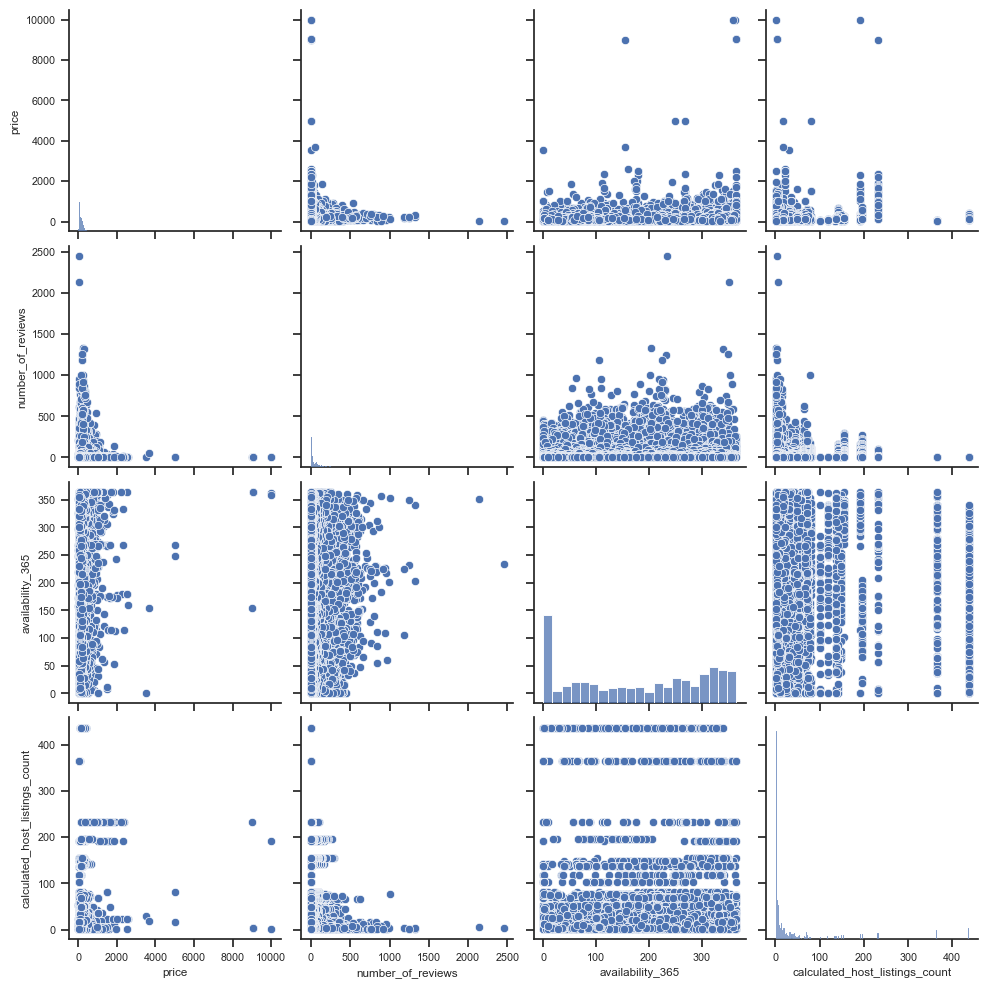

In [215]:
# Create scattermatrix view of feature relationship
columns_to_plot = ['price', 'number_of_reviews', 'availability_365', 'calculated_host_listings_count']
sns.set_theme(style = 'ticks', font_scale = 0.7)
sns.pairplot(df[columns_to_plot])
plt.show()

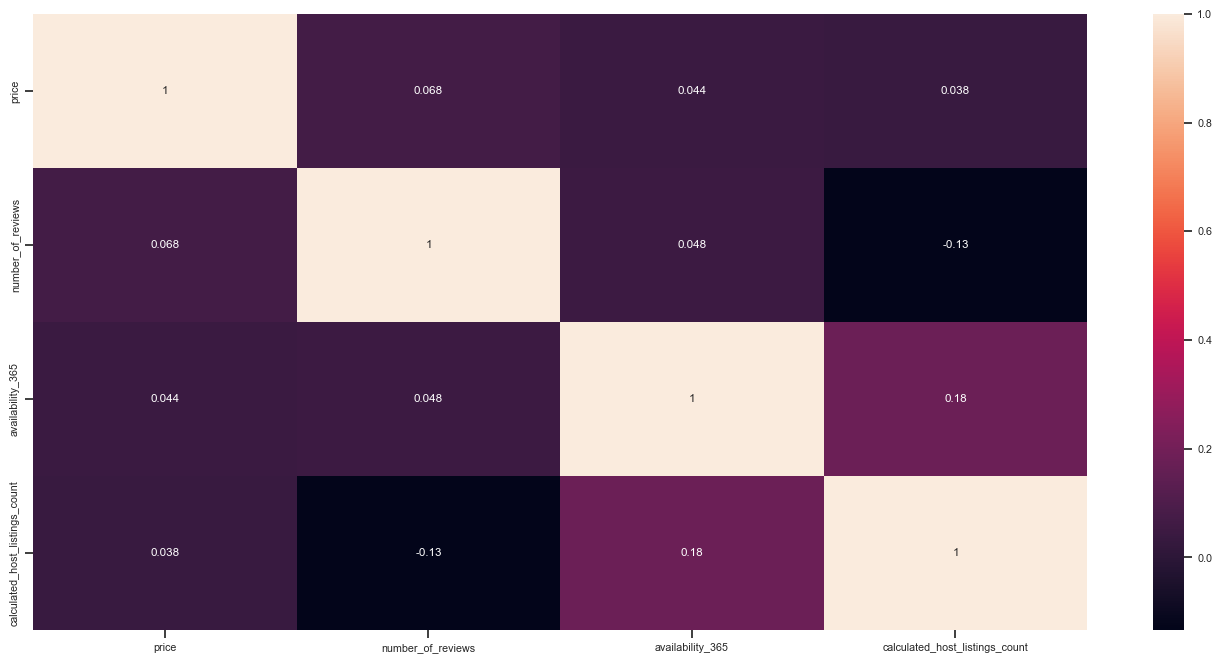

In [226]:
# Create heatmap of correlation for numeric columns with annotation
plt.figure(figsize = (17, 8))
sns.heatmap(df[['price', 'number_of_reviews', 'availability_365', 'calculated_host_listings_count']].corr(), annot = True)
plt.show()

In [228]:
# Chapter 2.3 Multivariate analysis: Categorical to Number
# Questions:
# Is host ranking related to the number of listings?
# Are higher ratings associated with property location? Which neighborhoods cost more or less?
# Is the listing price related to the room type?
# Are certain room types more or less prevalent based on location?
# Are listings with fewer or more booking availability more or less expensive to book?

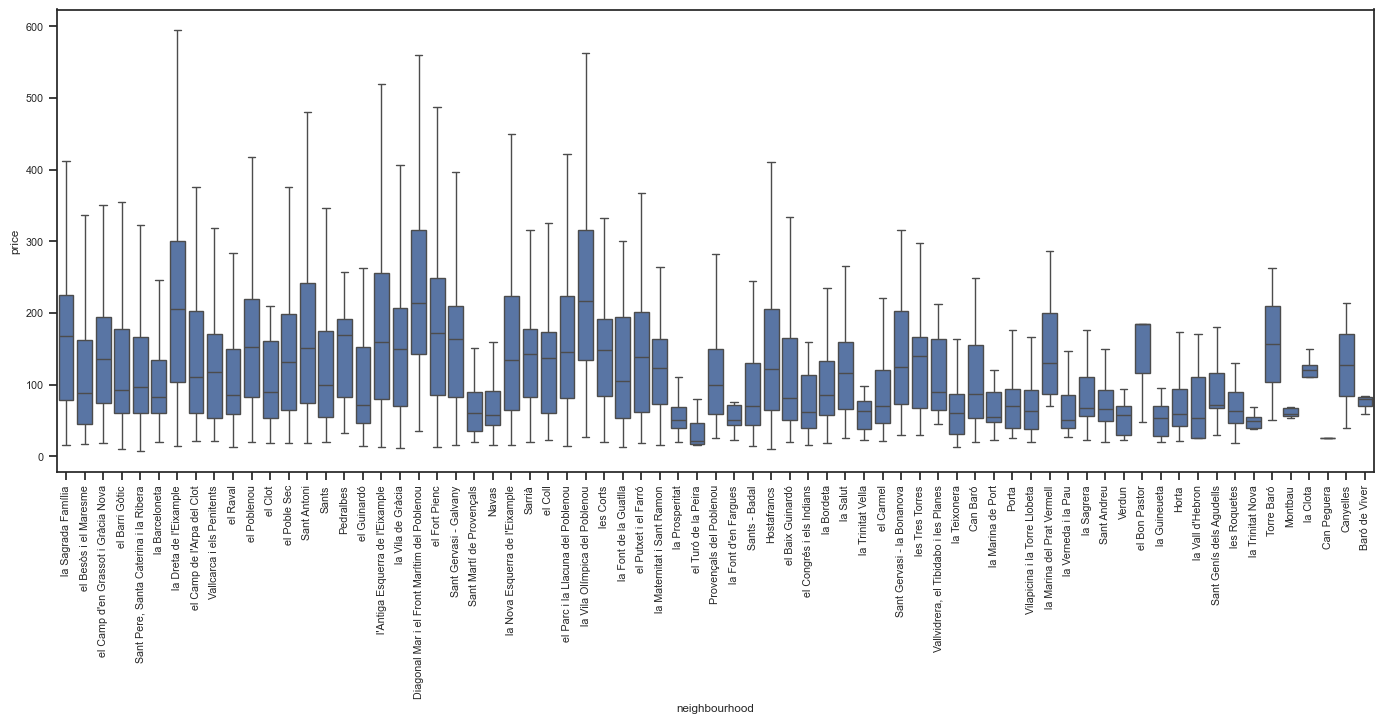

In [236]:
# Boxplot comparing neighborhood with price
plt.figure(figsize=(17, 6))
sns.boxplot(x = df['neighbourhood'], y = df['price'], showfliers = False)
plt.xticks(rotation = 90)
plt.show()

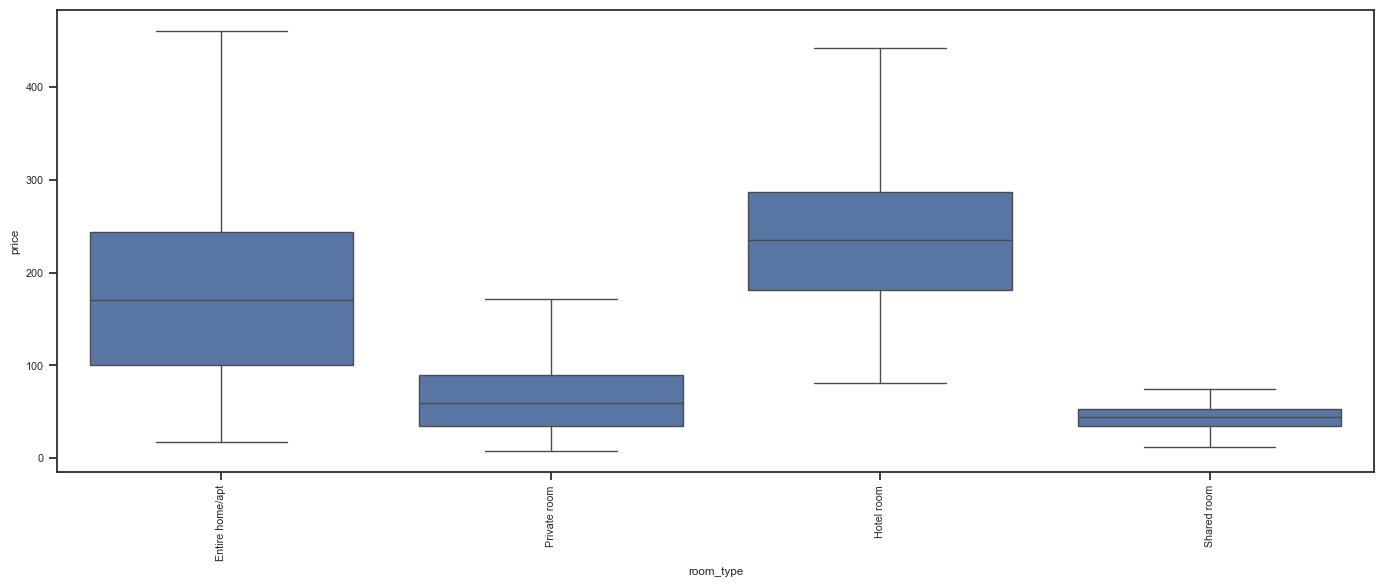

In [238]:
# Boxplot comparing room type with price
plt.figure(figsize=(17, 6))
sns.boxplot(x = df['room_type'], y = df['price'], showfliers = False)
plt.xticks(rotation = 90)
plt.show()

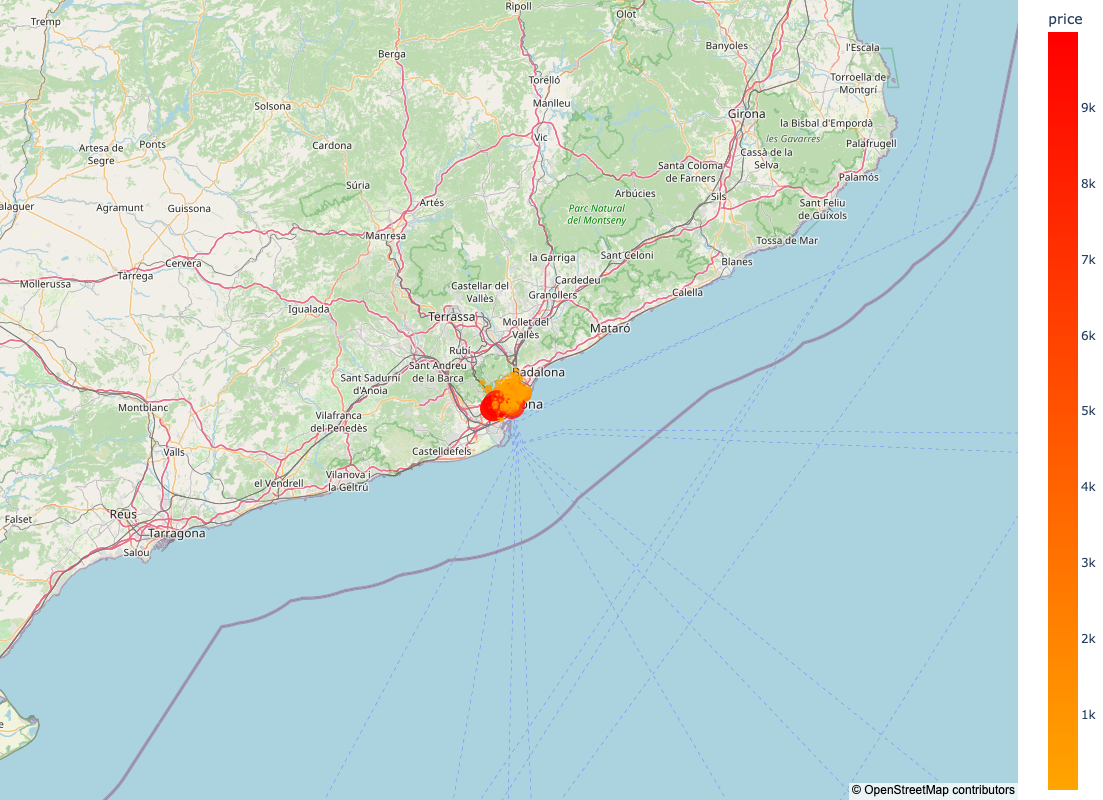

In [254]:
# Clean the DataFrame
df = df.dropna(subset=['price', 'latitude', 'longitude'])  # Remove rows with NaN in essential columns
df = df[df['price'] > 0]  # Ensure all prices are positive

# Define the color scale
color_scale = [(0, 'orange'), (1, 'red')]

# Create the scatter mapbox
fig = px.scatter_mapbox(
    df,
    lat='latitude',
    lon='longitude',
    hover_name='neighbourhood',
    hover_data=['neighbourhood', 'availability_365'],
    color='price',
    color_continuous_scale=color_scale,
    size='price',
    zoom=8,
    height=800,
    width=1100
)

# Update the layout
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r': 0, 't': 0, 'l': 0, 'b': 0})

# Show the figure
fig.show()